In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# License: MIT

In [3]:
%matplotlib inline

## Packages

In [4]:
import numpy as np
import scipy as scipy
import scipy.stats as stats
import scipy.linalg as linalg
from pprint import pprint

import matplotlib.gridspec as gridspec
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import sys
import os
import copy
import string
import glob
import xarray as xr 

import warnings

# Linear systems
In this notebook we find eigenvectors and eigenvalues of origin for linear systems. The eigenvectors and some solutions are plotted in state space.

# 2D examples

In [5]:
# set initial points for sample trajectories
x01 = np.array([-2,0])
x02 = np.array([0,-2])
x03 = np.array([2,0])
x04 = np.array([0,2])

In [6]:
# set iteration parameters
stepsize = 0.01;
tend = 10;
Ts = np.linspace(0,tend,int(tend/stepsize)+1)

In [7]:
# create empty solution vector 
x1s = np.empty((2,len(Ts)+1));
x1s[:] = np.nan

x2s = np.empty((2,len(Ts)+1));
x2s[:] = np.nan

x3s = np.empty((2,len(Ts)+1));
x3s[:] = np.nan

x4s = np.empty((2,len(Ts)+1));
x4s[:] = np.nan

## Stable node (sink)

In [8]:
A = np.array([[-5,-3],[-2,-2]])

[lams,V] = linalg.eig(A)

v1 = V[:,0]
v2 = V[:,1]

lam1 = lams[0]

lam2 = lams[1]

print("lambda 1 = " + str(lam1) + " and lambda 2 = " + str(lam2))

lambda 1 = (-6.372281323269014+0j) and lambda 2 = (-0.6277186767309857+0j)


In [32]:
i=0
for t in Ts:
    x1s[:,i] = np.matmul(linalg.expm(A*t),x01)
    x2s[:,i] = np.matmul(linalg.expm(A*t),x02)
    x3s[:,i] = np.matmul(linalg.expm(A*t),x03)
    x4s[:,i] = np.matmul(linalg.expm(A*t),x04)
    i += 1

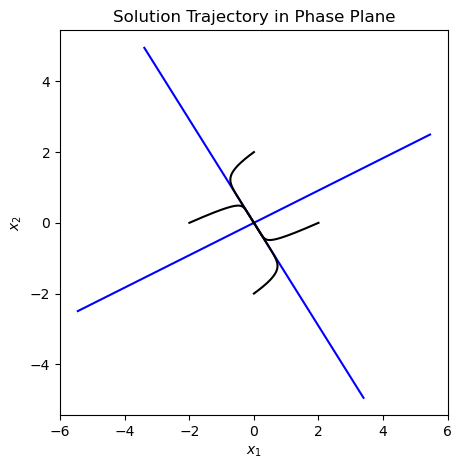

In [33]:
fig = plt.figure(figsize=(5,5))
# plot eigenvectors
plt.plot(6*np.exp(lam1*Ts)*v1[0],6*np.exp(lam1*Ts)*v1[1],c='b')
plt.plot(-6*np.exp(lam1*Ts)*v1[0],-6*np.exp(lam1*Ts)*v1[1],c='b')
plt.plot(6*np.exp(lam2*Ts)*v2[0],6*np.exp(lam2*Ts)*v2[1],c='b')
plt.plot(-6*np.exp(lam2*Ts)*v2[0],-6*np.exp(lam2*Ts)*v2[1],c='b')

# plot example trajectories
plt.plot(x1s[0,:],x1s[1,:],c='k')
plt.plot(x2s[0,:],x2s[1,:],c='k')
plt.plot(x3s[0,:],x3s[1,:],c='k')
plt.plot(x4s[0,:],x4s[1,:],c='k')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Solution Trajectory in Phase Plane")
plt.axis([-5,5,-5,5])
plt.show()

## Unstable node (source)

In [34]:
A = np.array([[2,1],[1,3]])

[lams,V] = linalg.eig(A)

v1 = V[:,0]
v2 = V[:,1]

lam1 = lams[0]

lam2 = lams[1]

print("lambda 1 = " + str(lam1) + " and lambda 2 = " + str(lam2))

lambda 1 = (1.381966011250105+0j) and lambda 2 = (3.618033988749895+0j)


In [35]:
i=0
for t in Ts:
    x1s[:,i] = np.matmul(linalg.expm(A*t),x01)
    x2s[:,i] = np.matmul(linalg.expm(A*t),x02)
    x3s[:,i] = np.matmul(linalg.expm(A*t),x03)
    x4s[:,i] = np.matmul(linalg.expm(A*t),x04)
    i += 1

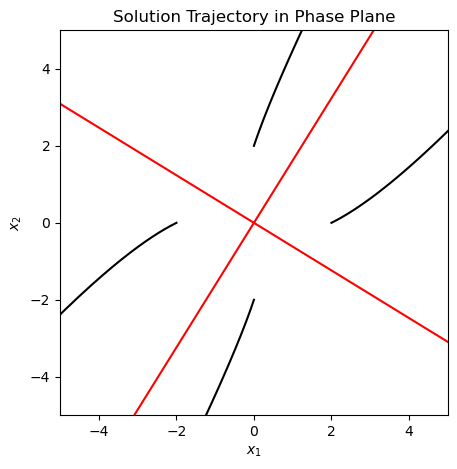

In [44]:
fig = plt.figure(figsize=(5,5))
# plot eigenvectors
plt.plot(-1e-4*np.exp(lam1*Ts)*v1[0],-1e-4*np.exp(lam1*Ts)*v1[1],c='r')
plt.plot(1e-4*np.exp(lam1*Ts)*v1[0],1e-4*np.exp(lam1*Ts)*v1[1],c='r')
plt.plot(1e-4*np.exp(lam2*Ts)*v2[0],1e-4*np.exp(lam2*Ts)*v2[1],c='r')
plt.plot(-1e-4*np.exp(lam2*Ts)*v2[0],-1e-4*np.exp(lam2*Ts)*v2[1],c='r')

# plot example trajectories
plt.plot(x1s[0,:],x1s[1,:],c='k')
plt.plot(x2s[0,:],x2s[1,:],c='k')
plt.plot(x3s[0,:],x3s[1,:],c='k')
plt.plot(x4s[0,:],x4s[1,:],c='k')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Solution Trajectory in Phase Plane")
plt.axis([-5,5,-5,5])
plt.show()

## Saddle

In [45]:
A = np.array([[-1,3],[2,-1]])

[lams,V] = linalg.eig(A)

v1 = V[:,0]
v2 = V[:,1]

lam1 = lams[0]

lam2 = lams[1]

print("lambda 1 = " + str(lam1) + " and lambda 2 = " + str(lam2))

lambda 1 = (1.4494897427831783+0j) and lambda 2 = (-3.449489742783178+0j)


In [46]:
i=0
for t in Ts:
    x1s[:,i] = np.matmul(linalg.expm(A*t),x01)
    x2s[:,i] = np.matmul(linalg.expm(A*t),x02)
    x3s[:,i] = np.matmul(linalg.expm(A*t),x03)
    x4s[:,i] = np.matmul(linalg.expm(A*t),x04)
    i += 1

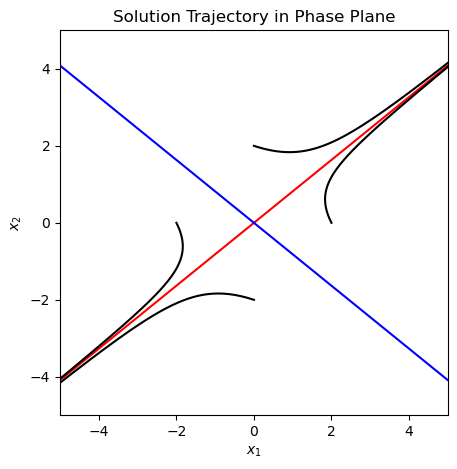

In [51]:
fig = plt.figure(figsize=(5,5))
# plot eigenvectors
plt.plot(-1e-4*np.exp(lam1*Ts)*v1[0],-1e-4*np.exp(lam1*Ts)*v1[1],c='r')
plt.plot(1e-4*np.exp(lam1*Ts)*v1[0],1e-4*np.exp(lam1*Ts)*v1[1],c='r')
plt.plot(1e2*np.exp(lam2*Ts)*v2[0],1e2*np.exp(lam2*Ts)*v2[1],c='b')
plt.plot(-1e2*np.exp(lam2*Ts)*v2[0],-1e2*np.exp(lam2*Ts)*v2[1],c='b')

# plot example trajectories
plt.plot(x1s[0,:],x1s[1,:],c='k')
plt.plot(x2s[0,:],x2s[1,:],c='k')
plt.plot(x3s[0,:],x3s[1,:],c='k')
plt.plot(x4s[0,:],x4s[1,:],c='k')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Solution Trajectory in Phase Plane")
plt.axis([-5,5,-5,5])
plt.show()

## Stable focus

In [52]:
A = np.array([[-2,2],[-2,-2]])

[lams,V] = linalg.eig(A)

v1 = V[:,0]
v2 = V[:,1]

lam1 = lams[0]

lam2 = lams[1]

print("lambda 1 = " + str(lam1) + " and lambda 2 = " + str(lam2))

lambda 1 = (-2+2.0000000000000004j) and lambda 2 = (-2-2.0000000000000004j)


In [53]:
i=0
for t in Ts:
    x1s[:,i] = np.matmul(linalg.expm(A*t),x01)
    x2s[:,i] = np.matmul(linalg.expm(A*t),x02)
    x3s[:,i] = np.matmul(linalg.expm(A*t),x03)
    x4s[:,i] = np.matmul(linalg.expm(A*t),x04)
    i += 1

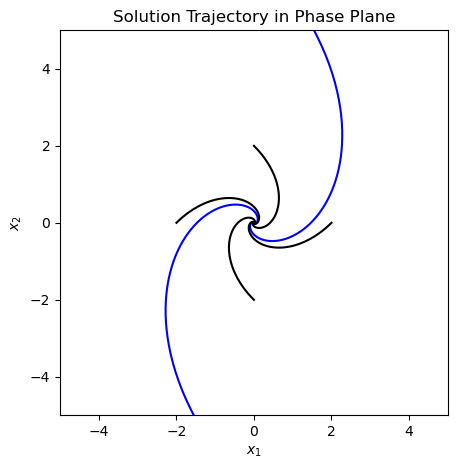

In [55]:
fig = plt.figure(figsize=(5,5))
# plot eigenvectors
plt.plot(5*np.exp(lam1*Ts)*v1[0]+5*np.exp(lam2*Ts)*v2[0],5*np.exp(lam1*Ts)*v1[1]+5*np.exp(lam2*Ts)*v2[1],c='b')
plt.plot(-5*np.exp(lam1*Ts)*v1[0]-5*np.exp(lam2*Ts)*v2[0],-5*np.exp(lam1*Ts)*v1[1]-5*np.exp(lam2*Ts)*v2[1],c='b')

# plot example trajectories
plt.plot(x1s[0,:],x1s[1,:],c='k')
plt.plot(x2s[0,:],x2s[1,:],c='k')
plt.plot(x3s[0,:],x3s[1,:],c='k')
plt.plot(x4s[0,:],x4s[1,:],c='k')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Solution Trajectory in Phase Plane")
plt.axis([-5,5,-5,5])
plt.show()

## Unstable focus

In [56]:
A = np.array([[2,2],[-2,2]])

[lams,V] = linalg.eig(A)

v1 = V[:,0]
v2 = V[:,1]

lam1 = lams[0]

lam2 = lams[1]

print("lambda 1 = " + str(lam1) + " and lambda 2 = " + str(lam2))

lambda 1 = (2+2.0000000000000004j) and lambda 2 = (2-2.0000000000000004j)


In [57]:
i=0
for t in Ts:
    x1s[:,i] = np.matmul(linalg.expm(A*t),x01)
    x2s[:,i] = np.matmul(linalg.expm(A*t),x02)
    x3s[:,i] = np.matmul(linalg.expm(A*t),x03)
    x4s[:,i] = np.matmul(linalg.expm(A*t),x04)
    i += 1

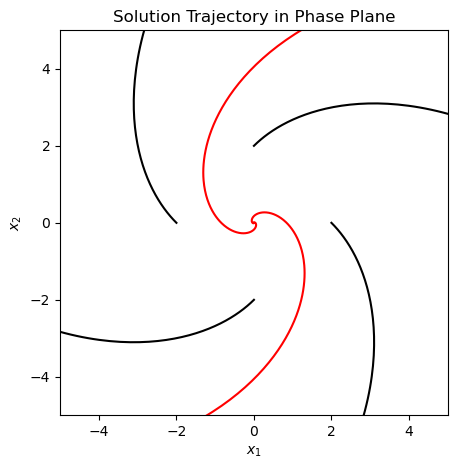

In [59]:
fig = plt.figure(figsize=(5,5))
# plot eigenvectors
plt.plot(1e-5*np.exp(lam1*Ts)*v1[0]+1e-5*np.exp(lam2*Ts)*v2[0],1e-5*np.exp(lam1*Ts)*v1[1]+1e-5*np.exp(lam2*Ts)*v2[1],c='r')
plt.plot(-1e-5*np.exp(lam1*Ts)*v1[0]-1e-5*np.exp(lam2*Ts)*v2[0],-1e-5*np.exp(lam1*Ts)*v1[1]-1e-5*np.exp(lam2*Ts)*v2[1],c='r')

# plot example trajectories
plt.plot(x1s[0,:],x1s[1,:],c='k')
plt.plot(x2s[0,:],x2s[1,:],c='k')
plt.plot(x3s[0,:],x3s[1,:],c='k')
plt.plot(x4s[0,:],x4s[1,:],c='k')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Solution Trajectory in Phase Plane")
plt.axis([-5,5,-5,5])
plt.show()

## Centre

In [62]:
A = np.array([[-1,3],[-3,1]])

[lams,V] = linalg.eig(A)

v1 = V[:,0]
v2 = V[:,1]

lam1 = lams[0]

lam2 = lams[1]

print("lambda 1 = " + str(lam1) + " and lambda 2 = " + str(lam2))

lambda 1 = (-3.043960907270858e-17+2.8284271247461903j) and lambda 2 = (-3.043960907270858e-17-2.8284271247461903j)


In [63]:
i=0
for t in Ts:
    x1s[:,i] = np.matmul(linalg.expm(A*t),x01)
    x2s[:,i] = np.matmul(linalg.expm(A*t),x02)
    x3s[:,i] = np.matmul(linalg.expm(A*t),x03)
    x4s[:,i] = np.matmul(linalg.expm(A*t),x04)
    i += 1

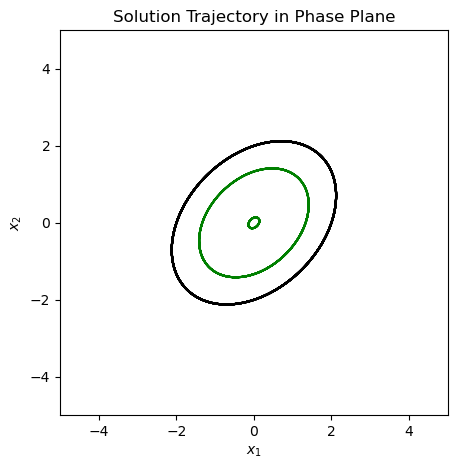

In [64]:
fig = plt.figure(figsize=(5,5))
# plot eigenvectors
plt.plot(1e-1*np.exp(lam1*Ts)*v1[0]+1e-1*np.exp(lam2*Ts)*v2[0],1e-1*np.exp(lam1*Ts)*v1[1]+1e-1*np.exp(lam2*Ts)*v2[1],c='g')
plt.plot(np.exp(lam1*Ts)*v1[0]+np.exp(lam2*Ts)*v2[0],np.exp(lam1*Ts)*v1[1]+np.exp(lam2*Ts)*v2[1],c='g')

# plot example trajectories
plt.plot(x1s[0,:],x1s[1,:],c='k')
plt.plot(x2s[0,:],x2s[1,:],c='k')
plt.plot(x3s[0,:],x3s[1,:],c='k')
plt.plot(x4s[0,:],x4s[1,:],c='k')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Solution Trajectory in Phase Plane")
plt.axis([-5,5,-5,5])
plt.show()

# 3D examples

In [65]:
# set initial points for sample trajectories
x01 = np.array([2,2,0])
x02 = np.array([0,2,1])
x03 = np.array([2,0,2])

In [66]:
# create empty solution vector 
x1s = np.empty((3,len(Ts)+1));
x1s[:] = np.nan

x2s = np.empty((3,len(Ts)+1));
x2s[:] = np.nan

x3s = np.empty((3,len(Ts)+1));
x3s[:] = np.nan

## Example 1

In [67]:
A = np.array([[-1,-2,0],[1,-2,-2],[0,1,-2]])

[lams,V] = linalg.eig(A)

v1 = V[:,0]
v2 = V[:,1]
v3 = V[:,2]

lam1 = lams[0]
lam2 = lams[1]
lam3 = lams[2]

print("lambda 1 = " + str(lam1) + ", lambda 2 = " + str(lam2) + ", lambda 3 = " + str(lam3))

lambda 1 = (-1.4668231650690808+0j), lambda 2 = (-1.76658841746546+1.922659547479677j), lambda 3 = (-1.76658841746546-1.922659547479677j)


In [68]:
i=0
for t in Ts:
    x1s[:,i] = np.matmul(linalg.expm(A*t),x01)
    x2s[:,i] = np.matmul(linalg.expm(A*t),x02)
    x3s[:,i] = np.matmul(linalg.expm(A*t),x03)
    i += 1

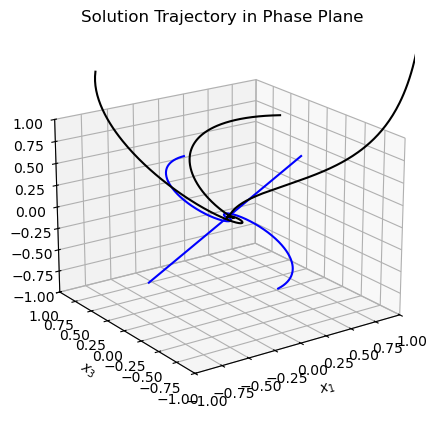

In [118]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
# plot eigenvectors
plt.plot(np.exp(lam1*Ts)*v1[0],np.exp(lam1*Ts)*v1[1],np.exp(lam1*Ts)*v1[2],c='b')
plt.plot(-np.exp(lam1*Ts)*v1[0],-np.exp(lam1*Ts)*v1[1],-np.exp(lam1*Ts)*v1[2],c='b')
plt.plot(np.exp(lam2*Ts)*v2[0]+np.exp(lam3*Ts)*v3[0],np.exp(lam2*Ts)*v2[1]+np.exp(lam3*Ts)*v3[1],np.exp(lam2*Ts)*v2[2]+np.exp(lam3*Ts)*v3[2],c='b')
plt.plot(-np.exp(lam2*Ts)*v2[0]-np.exp(lam3*Ts)*v3[0],-np.exp(lam2*Ts)*v2[1]-np.exp(lam3*Ts)*v3[1],-np.exp(lam2*Ts)*v2[2]-np.exp(lam3*Ts)*v3[2],c='b')

# plot example trajectories
plt.plot(x1s[0,:],x1s[1,:],x1s[2,:],c='k')
plt.plot(x2s[0,:],x2s[1,:],x2s[2,:],c='k')
plt.plot(x3s[0,:],x3s[1,:],x3s[2,:],c='k')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.ylabel("$x_3$")
plt.title("Solution Trajectory in Phase Plane")
plt.axis([-1,1,-1,1,-1,1])

# change 3D veiwing angle
ax.azim = -125
ax.elev = 20

plt.show()


## Example 2

In [121]:
A = np.array([[0,-2,0],[2,0,-2],[0,2,0]])

[lams,V] = linalg.eig(A)

v1 = V[:,0]
v2 = V[:,1]
v3 = V[:,2]

lam1 = lams[0]
lam2 = lams[1]
lam3 = lams[2]

print("lambda 1 = " + str(lam1) + ", lambda 2 = " + str(lam2) + ", lambda 3 = " + str(lam3))

lambda 1 = (-5.387705551013987e-17+2.8284271247461885j), lambda 2 = (-5.387705551013987e-17-2.8284271247461885j), lambda 3 = (-2.9910499867641896e-17+0j)


In [123]:
i=0
for t in Ts:
    x1s[:,i] = np.matmul(linalg.expm(A*t),x01)
    x2s[:,i] = np.matmul(linalg.expm(A*t),x02)
    x3s[:,i] = np.matmul(linalg.expm(A*t),x03)
    i += 1

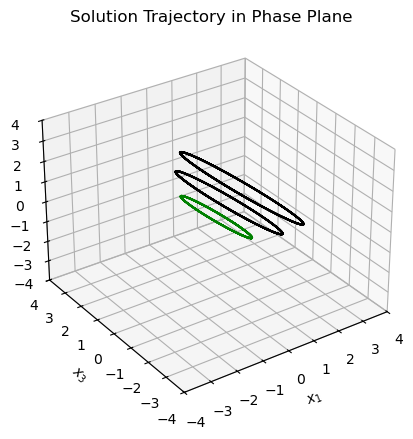

In [135]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
# plot eigenvectors
plt.plot(np.exp(lam3*Ts)*v3[0],np.exp(lam3*Ts)*v3[1],np.exp(lam3*Ts)*v3[2],c='g')
plt.plot(-np.exp(lam3*Ts)*v3[0],-np.exp(lam3*Ts)*v3[1],-np.exp(lam3*Ts)*v3[2],c='g')
plt.plot(np.exp(lam2*Ts)*v2[0]+np.exp(lam1*Ts)*v1[0],np.exp(lam2*Ts)*v2[1]+np.exp(lam1*Ts)*v1[1],np.exp(lam2*Ts)*v2[2]+np.exp(lam1*Ts)*v1[2],c='g')

# plot example trajectories
plt.plot(x1s[0,:],x1s[1,:],x1s[2,:],c='k')
plt.plot(x2s[0,:],x2s[1,:],x2s[2,:],c='k')
plt.plot(x3s[0,:],x3s[1,:],x3s[2,:],c='k')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.ylabel("$x_3$")
plt.title("Solution Trajectory in Phase Plane")
plt.axis([-4,4,-4,4,-4,4])

# change 3D veiwing angle
ax.azim = -125
ax.elev = 30

plt.show()
